In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


#import libraries

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Air quality prediction/air-quality-observations.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Feature selection and creation

In [ ]:
df_selected=df_encoded.copy()
df_selected= df_encoded.drop(columns=["ID","Location","Latitude","longitude","Point"])

In [ ]:
df_selected.head()

,Time,PM1,PM25,PM10,O3,NO2,CO,AQ
3,2023-01-15 05:11:27+00:00,0.0,0.000000,0.0,0.813333,1.000000,1.000000,1
4,2022-12-23 19:45:10+00:00,0.6,0.571429,0.4,0.746667,1.000000,0.361800,1
5,2022-12-23 20:30:10+00:00,0.6,0.714286,0.6,0.626667,0.803571,0.425547,1
6,2022-12-23 21:30:09+00:00,0.2,0.142857,0.1,0.506667,0.598214,0.574453,1
7,2022-12-23 22:00:10+00:00,0.4,0.285714,0.2,0.746667,0.937500,0.510706,1


Selected Features <80:
['CO']


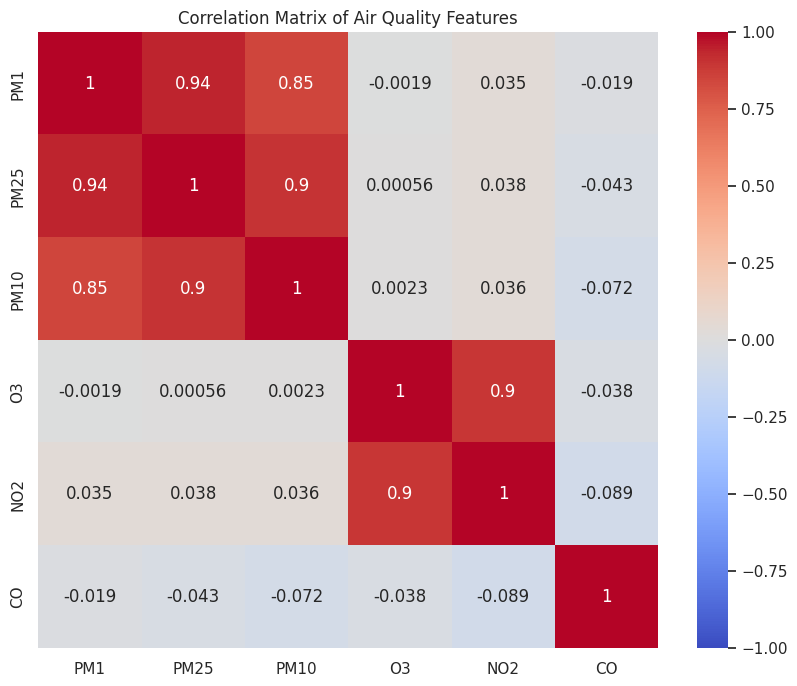

In [ ]:


corr_matrix = df_selected[['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO']].corr()


corr_matrix_no_self = corr_matrix.copy()

np.fill_diagonal(corr_matrix_no_self.values, 0)

max_abs_corr = corr_matrix_no_self.abs().max()

selected_features = max_abs_corr[max_abs_corr < 0.8].index.tolist()


print("Selected Features <80:")
print(selected_features)

# EDA Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Quality Features')
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/correlation_matrix.png')
plt.show()

Dataset with the new 'Avg_PM' feature:


/tmp/ipython-input-1248714146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQ', y='Avg_PM', data=df_selected, palette='deep')


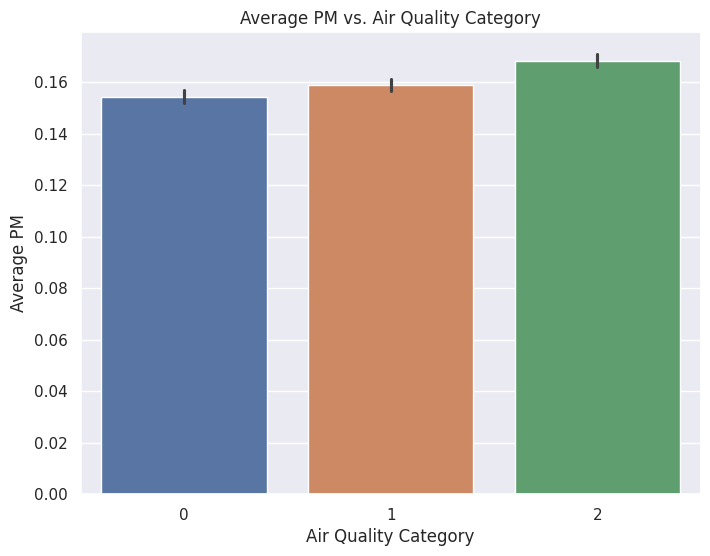


Correlation of 'Avg_PM' with 'AQ':
0.024585500571597994


In [ ]:
#add new feature called Avg_PM

df_selected['Avg_PM'] = (df_selected['PM1'] + df_selected['PM25'] + df_selected['PM10'])/3

print("Dataset with the new 'Avg_PM' feature:")
df_selected.head()

plt.figure(figsize=(8, 6))
sns.barplot(x='AQ', y='Avg_PM', data=df_selected, palette='deep')
plt.title('Average PM vs. Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Average PM')
# Save the plot (adjust the path as needed)
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/total_pm.png')
plt.show()

# Check the correlation of the new feature
print("\nCorrelation of 'Avg_PM' with 'AQ':")
print(df_selected.corr()['AQ']['Avg_PM'])

Dataset with the new 'Avg_O3_NO2' feature:


/tmp/ipython-input-2895257873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQ', y='Avg_O3_NO2', data=df_selected, palette='deep')


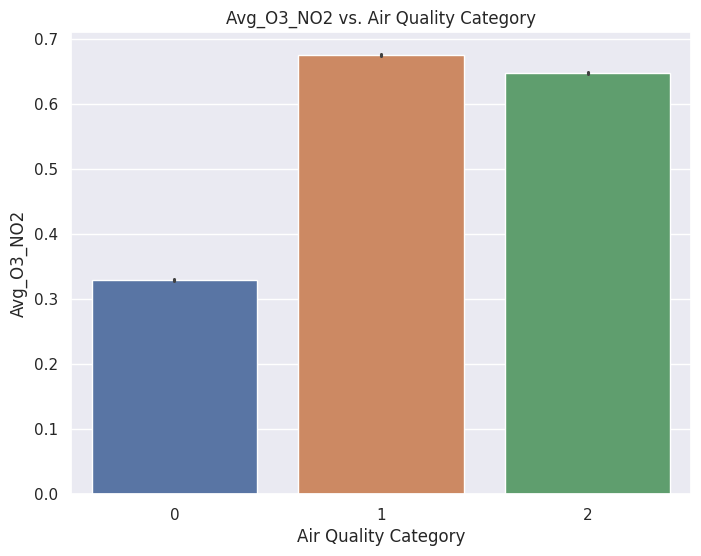


Correlation of 'Avg_O3_NO2' with 'AQ':
0.5951242396141353


In [ ]:
#add new feature called Avg_O3_NO2

df_selected['Avg_O3_NO2'] = (df_selected['O3'] + df_selected['NO2'] )/2

print("Dataset with the new 'Avg_O3_NO2' feature:")
df_selected.head()

plt.figure(figsize=(8, 6))
sns.barplot(x='AQ', y='Avg_O3_NO2', data=df_selected, palette='deep')
plt.title('Avg_O3_NO2 vs. Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Avg_O3_NO2')
# Save the plot (adjust the path as needed)
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/total_pm.png')
plt.show()

# Check the correlation of the new feature
print("\nCorrelation of 'Avg_O3_NO2' with 'AQ':")
print(df_selected.corr()['AQ']['Avg_O3_NO2'])

In [ ]:
df_selected.head()

,Time,PM1,PM25,PM10,O3,NO2,CO,AQ,Avg_PM,Avg_O3_NO2
3,2023-01-15 05:11:27+00:00,0.0,0.000000,0.0,0.813333,1.000000,1.000000,1,0.000000,0.906667
4,2022-12-23 19:45:10+00:00,0.6,0.571429,0.4,0.746667,1.000000,0.361800,1,0.523810,0.873333
5,2022-12-23 20:30:10+00:00,0.6,0.714286,0.6,0.626667,0.803571,0.425547,1,0.638095,0.715119
6,2022-12-23 21:30:09+00:00,0.2,0.142857,0.1,0.506667,0.598214,0.574453,1,0.147619,0.552440
7,2022-12-23 22:00:10+00:00,0.4,0.285714,0.2,0.746667,0.937500,0.510706,1,0.295238,0.842083
